# Part 1 - Data Cleaning

First we will go through and import all the packages we will be using as well as importing the Kaggle OS to use the two datasets that we have.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import colors

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)

/kaggle/input/superstore-data/superstore_profits.csv
/kaggle/input/superstore-data/superstore_dataset_rev1.csv


We will start by importing our two datasets.

The *dfstore* dataset is superstore transactions from 2019 to 2022, and the *dfprofits* dataset is the financial information from those same transactions.

In [3]:
dfstore = pd.read_csv(r'/kaggle/input/superstore-data/superstore_dataset_rev1.csv', parse_dates=True)
dfstore.head(3)

,orderid,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country
0,US-2020-103800-1,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,C,77095,houston,state of texas,United States
1,US-2020-112326-2,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,C,60540,naperville,state of illinois,United States
2,US-2020-112326-3,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,C,60540,naperville,state of illinois,United States


In [4]:
dfprofits = pd.read_csv(r'/kaggle/input/superstore-data/superstore_profits.csv')
dfprofits.head(3)

,orderid,discount,profit,quantity,sales,profit_margin
0,US-2020-103800-1,0.2,5.5512,2.0,16.448,0.3375
1,US-2020-112326-2,0.8,-5.4870,2.0,3.540,-1.5500
2,US-2020-112326-3,0.2,4.2717,3.0,11.784,0.3625


### Merging Dataframes and Checking Column Datatypes

These dataframes both have the same key column of 'orderid' so we can join/merge them together into one large dataframe. This will make the rest of the data cleaning and analysis much easier as we are only working on one dataframe.

In [5]:
dfsuper = pd.merge(dfstore, dfprofits, on='orderid')
dfsuper.head(3)

,orderid,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800-1,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,C,77095,houston,state of texas,United States,0.2,5.5512,2.0,16.448,0.3375
1,US-2020-112326-2,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,C,60540,naperville,state of illinois,United States,0.8,-5.4870,2.0,3.540,-1.5500
2,US-2020-112326-3,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,C,60540,naperville,state of illinois,United States,0.2,4.2717,3.0,11.784,0.3625


In [6]:
dfsuper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   orderid        9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9986 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9966 non-null   float64
 17  sales          9994 non-null   float64
 18  profit_m

We can see above that our dates (Column Index 1 and 2) did not properly get read in as datetime format so we will assign that below.

In [7]:
dfsuper['order_date'] = dfsuper['order_date'].astype('datetime64[ns]')
dfsuper['ship_date'] = dfsuper['ship_date'].astype('datetime64[ns]')

In [8]:
dfsuper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderid        9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   customer       9994 non-null   object        
 4   manufactory    9994 non-null   object        
 5   product_name   9994 non-null   object        
 6   segment        9994 non-null   object        
 7   category       9994 non-null   object        
 8   subcategory    9994 non-null   object        
 9   region         9994 non-null   object        
 10  zip            9994 non-null   int64         
 11  city           9994 non-null   object        
 12  state          9994 non-null   object        
 13  country        9994 non-null   object        
 14  discount       9986 non-null   float64       
 15  profit         9994 n

### Adding Datetime Columns

This will allow us to conduct more granular time series analysis later on in the project.

In [9]:
dfsuper['ordermonth'] = dfsuper['order_date'].dt.month_name()
dfsuper['ordermonthnum'] = dfsuper['order_date'].dt.month
dfsuper['orderyear'] = dfsuper['order_date'].dt.year
dfsuper['orderday'] = dfsuper['order_date'].dt.day_name()
dfsuper.head(3)

,orderid,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,ordermonth,ordermonthnum,orderyear,orderday
0,US-2020-103800-1,2019-01-03,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,C,77095,houston,state of texas,United States,0.2,5.5512,2.0,16.448,0.3375,January,1,2019,Thursday
1,US-2020-112326-2,2019-01-04,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,C,60540,naperville,state of illinois,United States,0.8,-5.4870,2.0,3.540,-1.5500,January,1,2019,Friday
2,US-2020-112326-3,2019-01-04,2019-01-08,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,C,60540,naperville,state of illinois,United States,0.2,4.2717,3.0,11.784,0.3625,January,1,2019,Friday


### Creating a Calculated Column

Now that we have the dates formatted correctly, we can calculate a new column for the number of days to ship. We will be using this for a piece of our analysis later on.

I will also pop the column off of the end of the dataframe and re-insert it at the correct index to make it easier for viewing.

In [10]:
dfsuper['daystoship'] = dfsuper['ship_date'] - dfsuper['order_date']
shipvalues = dfsuper['daystoship']
dfsuper.pop('daystoship')
dfsuper.insert(3, 'daystoship', shipvalues)
dfsuper.head()

,orderid,order_date,ship_date,daystoship,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,ordermonth,ordermonthnum,orderyear,orderday
0,US-2020-103800-1,2019-01-03,2019-01-07,4 days,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,C,77095,houston,state of texas,United States,0.2,5.5512,2.0,16.448,0.3375,January,1,2019,Thursday
1,US-2020-112326-2,2019-01-04,2019-01-08,4 days,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,C,60540,naperville,state of illinois,United States,0.8,-5.4870,2.0,3.540,-1.5500,January,1,2019,Friday
2,US-2020-112326-3,2019-01-04,2019-01-08,4 days,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,C,60540,naperville,state of illinois,United States,0.2,4.2717,3.0,11.784,0.3625,January,1,2019,Friday
3,US-2020-112326-4,2019-01-04,2019-01-08,4 days,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,C,60540,naperville,state of illinois,United States,0.2,-64.7748,3.0,272.736,-0.2375,January,1,2019,Friday
4,US-2020-141817-5,2019-01-05,2019-01-12,7 days,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,E,19143,philadelphia,state of pennsylvania,United States,0.2,4.8840,3.0,19.536,0.2500,January,1,2019,Saturday


Next, we can see that the region names in the 'region' column are only letters instead of their full names. We will update this column for readability.

We also first check to see all the unique values in that column, and we find that there isn't any 'north' value here, so we only have to map C, E, W, and S values.

In [11]:
dfsuper['region'].value_counts()

region
W    3203
E    2848
C    2323
S    1620
Name: count, dtype: int64

In [12]:
lettertoregion = {
    'C':'Central',
    'E':'East',
    'W':'West',
    'S':'South'
}
dfsuper['region'] = dfsuper['region'].map(lettertoregion)

In [13]:
dfsuper['region'].value_counts()

region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

### Handling NA Values and Potential Outliers

In [14]:
dfsuper.isna().sum()

orderid           0
order_date        0
ship_date         0
daystoship        0
customer          0
manufactory       0
product_name      0
segment           0
category          0
subcategory       0
region            0
zip               0
city              0
state             0
country           0
discount          8
profit            0
quantity         28
sales             0
profit_margin     0
ordermonth        0
ordermonthnum     0
orderyear         0
orderday          0
dtype: int64

In a dataframe with almost 10,000 rows, it may not affect our analysis much if we simply remove 34 NA rows, but I am going to impute the fields with different values based on the columns. I think is a better rule of thumb to approach NA values this way instead of always defaulting to removing them from the dataset.

We are going to fill the discount column NA's with a value of 0 indicating no discount. Then we will fill the quantity column NA's with the average value of the qty column. I am doing this because this dataset is based on orders and it would not seem correct for someone to order a quantity of zero and have it recorded in this dataset.

In [15]:
dfsuper['discount'] = dfsuper['discount'].fillna(0)

In [16]:
qtymean = dfsuper['quantity'].mean()
qtymean

3.7905879991972706

In [17]:
dfsuper['quantity'] = dfsuper['quantity'].fillna(qtymean)

In [18]:
dfsuper.isna().sum()

orderid          0
order_date       0
ship_date        0
daystoship       0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
ordermonth       0
ordermonthnum    0
orderyear        0
orderday         0
dtype: int64

Now that we have the NA values taken care of, we can check for any outliers quickly using the 'describe' function below.

In [19]:
dfsuper.describe()

,order_date,ship_date,daystoship,zip,discount,profit,quantity,sales,profit_margin,ordermonthnum,orderyear
count,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2021-04-30 05:17:08.056834048,2021-05-04 04:17:20.304182528,3 days 23:00:12.247348409,55190.371723,0.656003,28.656896,3.790588,229.858001,0.120314,7.809686,2020.722233
min,2019-01-03 00:00:00,2019-01-07 00:00:00,0 days 00:00:00,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000,1.000000,2019.000000
25%,2020-05-23 00:00:00,2020-05-27 00:00:00,3 days 00:00:00,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000,5.000000,2020.000000
50%,2021-06-26 00:00:00,2021-06-29 00:00:00,4 days 00:00:00,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000,9.000000,2021.000000
75%,2022-05-14 00:00:00,2022-05-18 00:00:00,5 days 00:00:00,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500,11.000000,2022.000000
max,2022-12-30 00:00:00,2023-01-05 00:00:00,7 days 00:00:00,99301.000000,999.000000,8399.976000,14.000000,22638.480000,0.500000,12.000000,2022.000000
std,NaN,NaN,1 days 17:56:32.858428469,32063.705315,22.338010,234.260108,2.223073,623.245101,0.466754,3.284654,1.123555


I am going to address the 999 value in the discount column, as we can see there is max value of 999 which seems like an unusal number for a discount. First lets double check if 999 is an outlier in the dataset, as well as seeing if it is the only outlier value.

In [20]:
dfsuper['discount'].value_counts()

discount
0.00      4793
0.20      3657
0.70       418
0.80       300
0.30       227
0.40       206
0.60       138
0.10        94
0.50        66
0.15        52
0.32        27
0.45        11
999.00       5
Name: count, dtype: int64

Since we can see that 999 seems to be the only outlier value out off all the unique values in this column, we can address it here and replace it with a 0 instead.

In [21]:
dfsuper['discount'] = dfsuper['discount'].replace(999,0)
dfsuper['discount'].value_counts()

discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [22]:
dfsuper.describe()

,order_date,ship_date,daystoship,zip,discount,profit,quantity,sales,profit_margin,ordermonthnum,orderyear
count,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2021-04-30 05:17:08.056834048,2021-05-04 04:17:20.304182528,3 days 23:00:12.247348409,55190.371723,0.156203,28.656896,3.790588,229.858001,0.120314,7.809686,2020.722233
min,2019-01-03 00:00:00,2019-01-07 00:00:00,0 days 00:00:00,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000,1.000000,2019.000000
25%,2020-05-23 00:00:00,2020-05-27 00:00:00,3 days 00:00:00,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000,5.000000,2020.000000
50%,2021-06-26 00:00:00,2021-06-29 00:00:00,4 days 00:00:00,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000,9.000000,2021.000000
75%,2022-05-14 00:00:00,2022-05-18 00:00:00,5 days 00:00:00,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500,11.000000,2022.000000
max,2022-12-30 00:00:00,2023-01-05 00:00:00,7 days 00:00:00,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000,12.000000,2022.000000
std,NaN,NaN,1 days 17:56:32.858428469,32063.705315,0.206452,234.260108,2.223073,623.245101,0.466754,3.284654,1.123555


### More Data Cleaning and Preparation

Next we will continue to clean the data a bit more by cleaning up the city and state columns. These will be capitalized and we will remove the 'state of' text in the state column.

In [23]:
dfsuper[['city','state']].head()

,city,state
0,houston,state of texas
1,naperville,state of illinois
2,naperville,state of illinois
3,naperville,state of illinois
4,philadelphia,state of pennsylvania


In [24]:
dfsuper['city'] = dfsuper['city'].str.title()
dfsuper['city'].head()

0         Houston
1      Naperville
2      Naperville
3      Naperville
4    Philadelphia
Name: city, dtype: object

In [25]:
dfsuper['state'] = dfsuper['state'].str.replace('state of', '')
dfsuper['state'] = dfsuper['state'].str.title()
dfsuper['state']

0               Texas
1            Illinois
2            Illinois
3            Illinois
4        Pennsylvania
            ...      
9989          Indiana
9990         New York
9991         New York
9992         New York
9993         Colorado
Name: state, Length: 9994, dtype: object

Now our city and state columns looks much cleaner and will appearly nicely in our future analysis.

In [26]:
dfsuper[['city','state']]

,city,state
0,Houston,Texas
1,Naperville,Illinois
2,Naperville,Illinois
3,Naperville,Illinois
4,Philadelphia,Pennsylvania
...,...,...
9989,Columbus,Indiana
9990,New York City,New York
9991,New York City,New York
9992,New York City,New York


Next, I think it would be a good idea to split the customer names into first and last names for more flexbility in data analysis if needed. Perhaps in the future we would need to sort by last name or look for a specific first name in the data.

In [27]:
dfsuper['customer'].head()

0    Darren Powers
1    Phillina Ober
2    Phillina Ober
3    Phillina Ober
4       Mick Brown
Name: customer, dtype: object

In [28]:
names = dfsuper['customer'].str.split(' ', expand=True)
firstnames = names[0]
lastnames = names[1]
dfsuper.insert(4, 'firstname', firstnames)
dfsuper.insert(5, 'lastname', lastnames)

In [29]:
dfsuper.drop(columns='customer', inplace=True)

In [30]:
dfsuper.head()

,orderid,order_date,ship_date,daystoship,firstname,lastname,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,ordermonth,ordermonthnum,orderyear,orderday
0,US-2020-103800-1,2019-01-03,2019-01-07,4 days,Darren,Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2.0,16.448,0.3375,January,1,2019,Thursday
1,US-2020-112326-2,2019-01-04,2019-01-08,4 days,Phillina,Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2.0,3.540,-1.5500,January,1,2019,Friday
2,US-2020-112326-3,2019-01-04,2019-01-08,4 days,Phillina,Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3.0,11.784,0.3625,January,1,2019,Friday
3,US-2020-112326-4,2019-01-04,2019-01-08,4 days,Phillina,Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3.0,272.736,-0.2375,January,1,2019,Friday
4,US-2020-141817-5,2019-01-05,2019-01-12,7 days,Mick,Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3.0,19.536,0.2500,January,1,2019,Saturday


Lastly, lets add some granularity to the data using the orderid. This way we can see the actual orderid seperately from the rest of the id information. 

The current order ID has several '-' characters within it, so we can split the column on those and assign new columns to those separated values.

In [31]:
idcols = dfsuper['orderid'].str.split('-', expand=True)
idcols

,0,1,2,3
0,US,2020,103800,1
1,US,2020,112326,2
2,US,2020,112326,3
3,US,2020,112326,4
4,US,2020,141817,5
...,...,...,...,...
9989,US,2023,126221,9990
9990,US,2023,143259,9991
9991,US,2023,143259,9992
9992,US,2023,143259,9993


Column index 2 contains the actual order ID, while column index 3 contains the transaction ID which is unique to each row of this dataset (one row per item transaction). We will make a new column for both of these, while leaving the original 'orderid' column in the dataset and unchanged.

In [32]:
ordernums = idcols[2]
transactions = idcols[3]
dfsuper.insert(1, 'ordernum', ordernums)
dfsuper.insert(2, 'transactionid', transactions)

In [33]:
dfsuper.head()

,orderid,ordernum,transactionid,order_date,ship_date,daystoship,firstname,lastname,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,ordermonth,ordermonthnum,orderyear,orderday
0,US-2020-103800-1,103800,1,2019-01-03,2019-01-07,4 days,Darren,Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2.0,16.448,0.3375,January,1,2019,Thursday
1,US-2020-112326-2,112326,2,2019-01-04,2019-01-08,4 days,Phillina,Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2.0,3.540,-1.5500,January,1,2019,Friday
2,US-2020-112326-3,112326,3,2019-01-04,2019-01-08,4 days,Phillina,Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3.0,11.784,0.3625,January,1,2019,Friday
3,US-2020-112326-4,112326,4,2019-01-04,2019-01-08,4 days,Phillina,Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3.0,272.736,-0.2375,January,1,2019,Friday
4,US-2020-141817-5,141817,5,2019-01-05,2019-01-12,7 days,Mick,Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3.0,19.536,0.2500,January,1,2019,Saturday


# Part 2 - Data Analysis and Insights

Now that our data is cleaned into one full dataset we can start to conduct our analysis.

Below are a series of graphs and visualizations with aggregated data which help analyze profitability and order volume. This first section of analysis will be using the entire 4 years of data as a whole.

<Axes: title={'center': 'Total Profit ($) per Region (2019-2022)'}, xlabel='Region', ylabel='Total Dollars'>

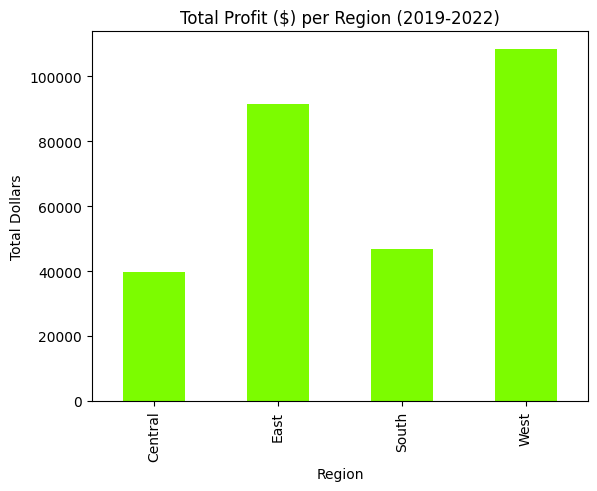

In [34]:
dfsumbyregion = dfsuper.groupby('region').sum(numeric_only=True)
dfprofitbyregion = dfsumbyregion['profit']
dfprofitbyregion.plot.bar(title='Total Profit ($) per Region (2019-2022)', color='lawngreen', ylabel='Total Dollars', xlabel='Region')

We can see that the East and West regions are generating the most profit for the store.

<Axes: title={'center': 'Total Sales ($) per Region (2019-2022)'}, xlabel='Region', ylabel='Total Dollars'>

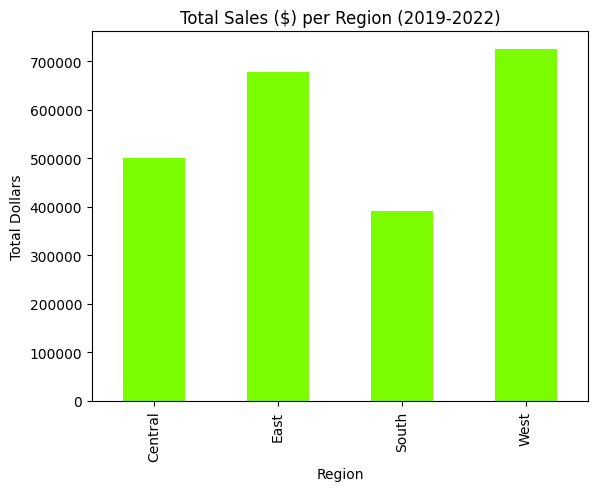

In [35]:
dfsumbyregion = dfsuper.groupby('region').sum(numeric_only=True)
dfsalesbyregion = dfsumbyregion['sales']
dfsalesbyregion.plot.bar(title='Total Sales ($) per Region (2019-2022)', color='lawngreen', ylabel='Total Dollars', xlabel='Region')

The east and west regions also have the most sales as well. I did happen to notice that the central region has higher sales than the south region. This caught my eye because the south region had a higher total profit than the central region in our first graph. This next graph will look at the total profit margin per region.

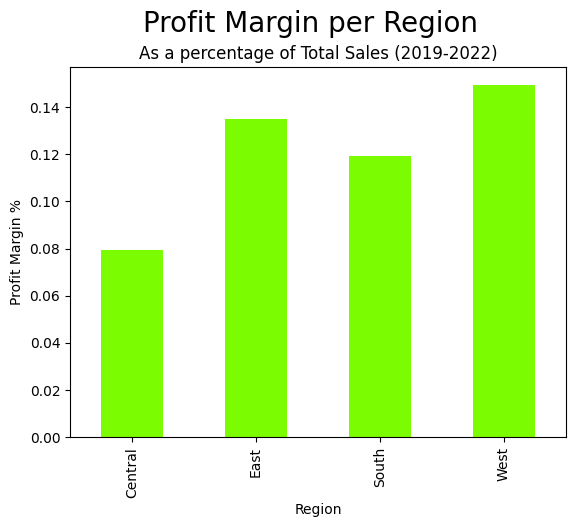

In [36]:
dfsumbyregion = dfsuper.groupby('region').sum(numeric_only=True)
dfmarginbyregion = dfsumbyregion['profit'] / dfsumbyregion['sales']
dfmarginbyregion.plot.bar(color='lawngreen', ylabel='Profit Margin %', xlabel='Region')
plt.title('As a percentage of Total Sales (2019-2022)',fontsize=12)
plt.suptitle('Profit Margin per Region',fontsize=20, y=1)
plt.show()

So we can confirm here that the central region has the lowest profit margin. This is how the central region had higher sales than the south region, but lower total profits.

Why is the central region so much less profitable? With the limited amount of data we have in this dataset, I figured perhaps the discounting of items can have a strong affect on the profitability of the region. Lets take a look at the average transaction discount per region.

<Axes: title={'center': 'Average Transaction Discount per Region'}, xlabel='Region', ylabel='Discount %'>

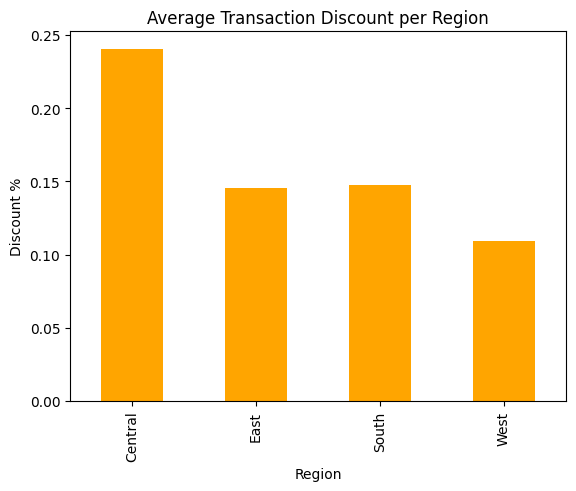

In [37]:
dfmeanbyregion = dfsuper.groupby('region').mean(numeric_only=True)
dfavgdiscbyregion =dfmeanbyregion['discount']
dfavgdiscbyregion.plot.bar(color='orange', ylabel='Discount %', xlabel='Region', title='Average Transaction Discount per Region')

### Profitability on the Central Region - Insight
We can see here that the central region is discounting its products much more than the other regions. We do not have information as to why this may be, but we can be fairly certain that this is a very strong factor negatively affecting the profitability of the region.

<Axes: title={'center': 'Number of Unique Orders per Region (2019-2022)'}, xlabel='Region', ylabel='Total Unique Orders'>

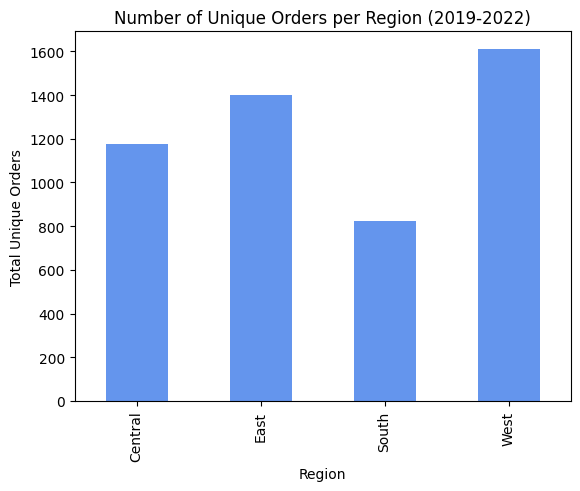

In [38]:
dfcountbyregion = dfsuper.groupby('region').nunique()
dfordersbyregion = dfcountbyregion['ordernum']
dfordersbyregion.plot.bar(title='Number of Unique Orders per Region (2019-2022)', ylabel='Total Unique Orders', xlabel='Region', color='cornflowerblue')

This graph above is based on the total number of unique orders per region, based on the 'ordernum' column. This graph has roughly the same shape as the total sales graph which makes sense.

<Axes: title={'center': 'Order Volume per State (2019-2022)'}, xlabel='State', ylabel='Total Unique Orders'>

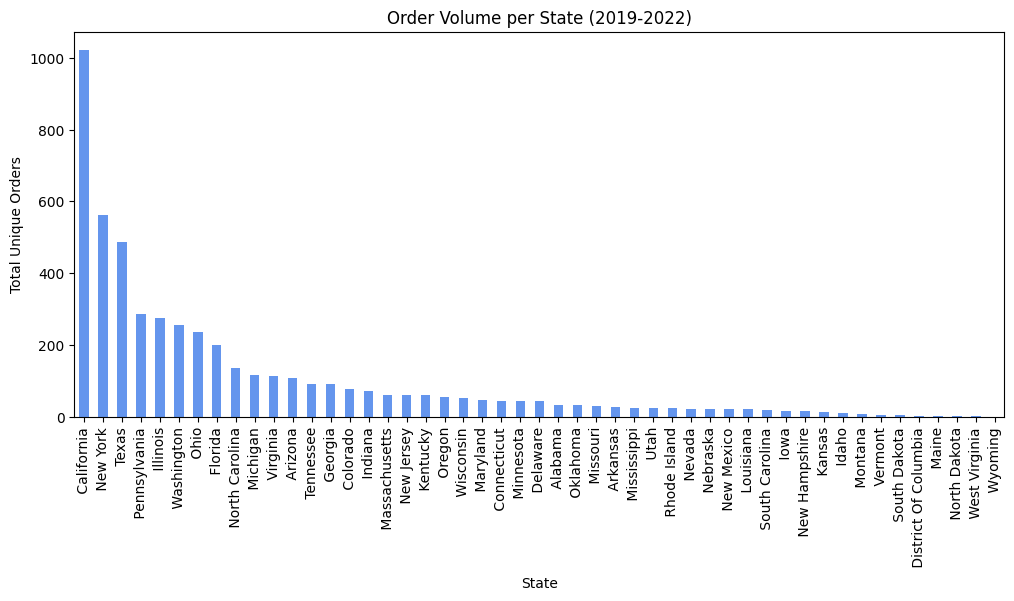

In [39]:
dfcountbystate = dfsuper.groupby('state').nunique()
dfordersbystate = dfcountbystate['ordernum'].sort_values(ascending=False)
dfordersbystate.plot.bar(title='Order Volume per State (2019-2022)', ylabel='Total Unique Orders', xlabel='State', color='cornflowerblue', figsize=(12,5))

Above, we can see that the highest order volume occurs in California by far. Perhaps we want to dig deeper and see which cities within California are ordering the most? We can do that next.

### Diving Deeper

Because we can see that California has the highest volume of orders, we can take a look at the cities within California specifically to see which cities top the list for highest order volume.

<Axes: title={'center': 'Top 10 Order Volume by City in California (2019-2022)'}, xlabel='State', ylabel='Total Unique Orders'>

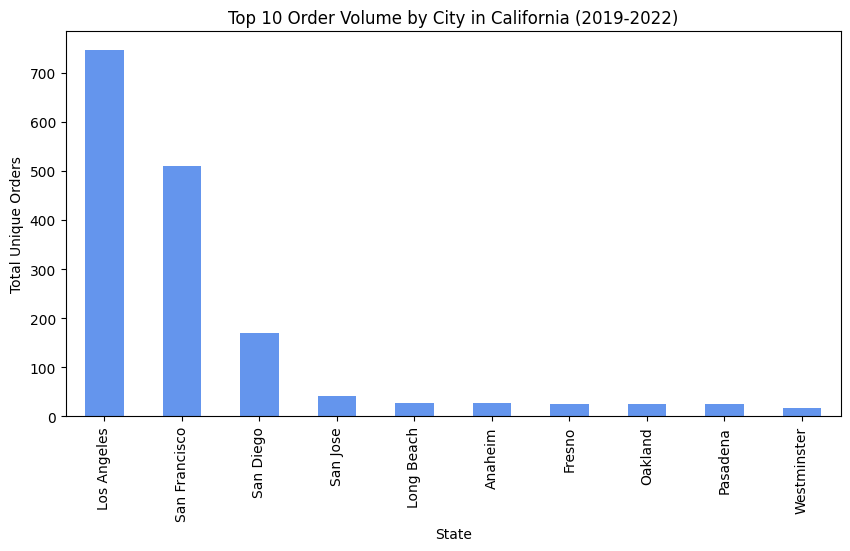

In [40]:
topstate = 'California'
dfsupercali = dfsuper[dfsuper['state'].str.contains(topstate, case=False)]
dfcountbycalicity = dfsupercali.groupby('city').count()
dfordersbycalicity = dfcountbycalicity['ordernum'].sort_values(ascending=False).head(10)
dfordersbycalicity.plot.bar(title='Top 10 Order Volume by City in California (2019-2022)', ylabel='Total Unique Orders', xlabel='State', color='cornflowerblue', figsize=(10,5))

LA and San Fransico are the cities with the largest volumes of orders in California.

We can also look at a list of all top cities by order volume, also with the respective state that they are located in.

In [41]:
dfcountbycitystate = dfsuper.groupby(['state','city']).nunique()
dfordersbycitystate = dfcountbycitystate['ordernum'].sort_values(ascending=False)
dfordersbycitystate.head(15)

state         city         
New York      New York City    450
California    Los Angeles      384
              San Francisco    265
Pennsylvania  Philadelphia     265
Washington    Seattle          212
Texas         Houston          188
Illinois      Chicago          171
California    San Diego         88
Texas         Dallas            80
Ohio          Columbus          55
Michigan      Detroit           53
Georgia       Columbus          40
Florida       Jacksonville      38
              Miami             34
Arizona       Phoenix           29
Name: ordernum, dtype: int64

Are orders shipping out on time? Next, let's take a look at the average days to ship by region, using the calculated column that we created earlier.

In [42]:
dfavgbyregion= dfsuper.groupby('region')['daystoship']

meandaystoship = dfavgbyregion.apply(lambda x: np.mean(x))
dfmeandays = pd.DataFrame(meandaystoship)
dfmeandays

,daystoship
region,
Central,4 days 01:22:26.706844597
East,3 days 21:49:33.033707865
South,3 days 23:01:20
West,3 days 22:19:17.664689353


It seems that almost every region is shipping orders roughly in the same lead time.

The scatter plot below sheds light on how the discount applied to products can affect their overall profitability. We can see that as discount on the product increases, the profit margin decreases.

<Axes: title={'center': 'Profit Margin vs Discount'}, xlabel='discount', ylabel='profit_margin'>

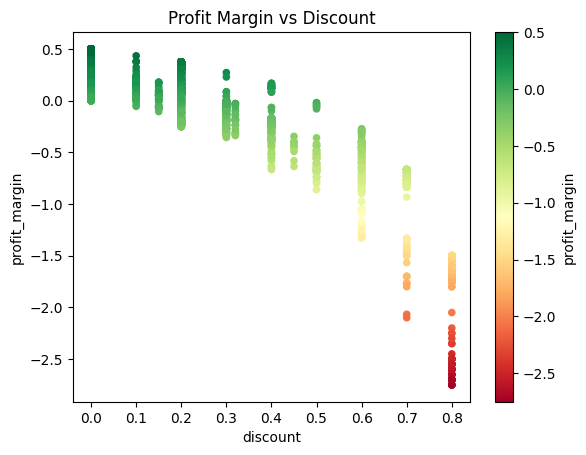

In [43]:
dfsuper.plot.scatter('discount', 'profit_margin', title='Profit Margin vs Discount', c='profit_margin', cmap='RdYlGn')

### Discounts - Insight

We can see above that as the discounts grow above the 20% range or so, the item is likely to not be profitable anymore. While the discounts may still be needed to clear inventory, it is a good idea to keep this graph in mind when setting discounts on products in the store.

Which categories/items have the highest profitability? 

Top 10 Manufactory Categories by Average Profit Margin.

In [44]:
dfbyitemtype = dfsuper.groupby('manufactory').mean(numeric_only=True)
dfmarginbytype = dfbyitemtype['profit_margin']
dfmargin = dfmarginbytype.sort_values(ascending=False).head(10)
dfmargintable = pd.DataFrame(dfmargin)
dfmargintable

,profit_margin
manufactory,
Hammermil,0.448500
REDIFORM,0.448214
Array,0.447500
Adams,0.444712
Strathmore,0.443235
Wirebound,0.432946
Staple envelope,0.432708
Ampad,0.432396
Easy-staple paper,0.431576


Which items are the least profitable? 

Bottom 10 Manufactory Categories by Average Profit Margin.

In [45]:
dflowmargin = dfmarginbytype.sort_values(ascending=True).head(10)
dflowmargintable = pd.DataFrame(dflowmargin)
dflowmargintable

,profit_margin
manufactory,
Cubify,-0.834583
Storex,-0.562292
Bestar,-0.467132
Euro Pro,-0.448025
Premier,-0.437206
Hoover,-0.414289
Tripp Lite,-0.370667
Epson,-0.324667
Balt,-0.309592


### Item Profitability - Insight
The superstore should keep an eye on its most profitable and least profitable products at all times. If a store is commonly selling items that aren't profitable, the business's performance will suffer. The store should seek a way to improve the profitability of these items by increasing prices or reducing costs.

There is also the probability that some of these items may be part of a 'loss leader' sales strategy for the store, meaning that they sell some items at a deep discount to get consumers into the store and buy other items along with the discounted item.

Lastly, here is the Top 10 Best Selling Products Overall. These items will be critical to keep in stock to maintain order volumes.

In [46]:
dfsumbyitemtype = dfsuper.groupby('manufactory').sum(numeric_only=True)
dfqtybytype = dfsumbyitemtype['quantity'].sort_values(ascending=False).head(10)
dfqtytable = pd.DataFrame(dfqtybytype)
dfqtytable

,quantity
manufactory,
Other,7145.743528
Xerox,3221.790588
Avery,2134.952940
GBC,1309.000000
Global,1062.790588
Newell,1029.790588
Eldon,946.790588
Fellowes,912.000000
Acco,803.581176


# Part 3 - Time Series Analysis

This first graph will take a look at the total number of orders and sales by year, which will be a straightforward way to see if the business is growing or not.

<Axes: title={'center': 'Total Orders per Year'}, xlabel='Year', ylabel='Total Unique Orders'>

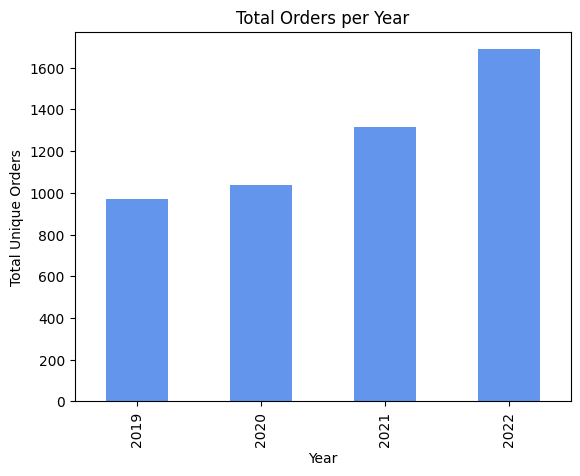

In [47]:
dfcountperyear = dfsuper.groupby('orderyear').nunique()
dfordersperyear = dfcountperyear['ordernum']
dfordersperyear.plot.bar(title='Total Orders per Year', ylabel='Total Unique Orders', xlabel='Year', color='cornflowerblue')

<Axes: title={'center': 'Total Sales per Year'}, xlabel='Year', ylabel='Total Sales'>

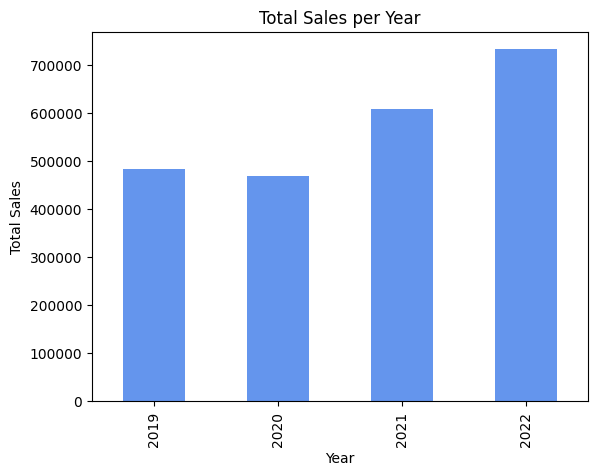

In [55]:
dfsumperyear = dfsuper.groupby('orderyear').sum(numeric_only=True)
dfsalesperyear = dfsumperyear['sales']
dfsalesperyear.plot.bar(title='Total Sales per Year', ylabel='Total Sales', xlabel='Year', color='cornflowerblue')

### Sales Growth - Insight

While these two graphs are straightforward, they point to the fact that the sales and the number of orders have been trending upward for the store at a steady pace.

<Axes: title={'center': 'Total Orders Grouped by Month'}, xlabel='Month', ylabel='Total Unique Orders'>

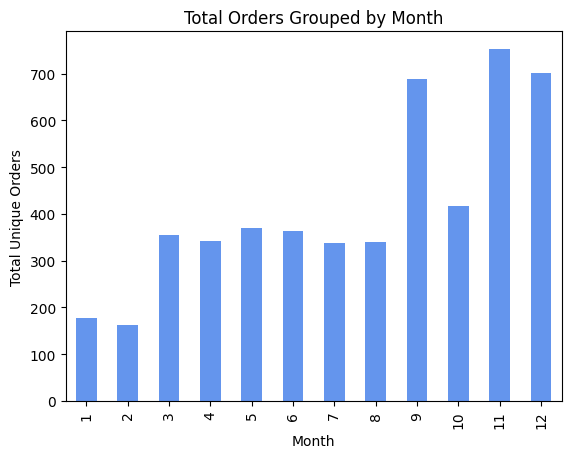

In [48]:
dfcountpermonth = dfsuper.groupby('ordermonthnum').nunique()
dforderspermonth = dfcountpermonth['ordernum']
dforderspermonth.plot.bar(title='Total Orders Grouped by Month', ylabel='Total Unique Orders', xlabel='Month', color='cornflowerblue')

### Seasonality - Insight

We can see above that Sept, Nov, and Dec have the highest order volumes of the year on average. So each year we can expect some seasonailty in our order volumes. In the US the last few months of the year are considered the holiday season, which lines up quite well with this dataset and could partially explain the higher volumes of orders in those months. 

For the purposes of smoothing out some of the time series data in this dataset, I am going to calculate approximately how many transactions there are per year, and then divide by 12 to get a number of transactions that we can use for a rough approximation of a monthly moving average.

In [49]:
dfannualtransactions = dfsuper.groupby('orderyear').count()
dfannualtransactions['ordernum'].mean() / 12

208.20833333333334

We end up getting just over 200 transactions per month over the whole dataset which I am going to use for our moving average. We can set the moving average length in the cell below and continue on with our analysis using two new calculated moving average columns.

In [50]:
dfsuper['salesma'] = dfsuper['sales'].rolling(window=200).mean()
dfsuper['profitma'] = dfsuper['profit'].rolling(window=200).mean()
dfsuper.head(3)

,orderid,ordernum,transactionid,order_date,ship_date,daystoship,firstname,lastname,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,ordermonth,ordermonthnum,orderyear,orderday,salesma,profitma
0,US-2020-103800-1,103800,1,2019-01-03,2019-01-07,4 days,Darren,Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2.0,16.448,0.3375,January,1,2019,Thursday,NaN,NaN
1,US-2020-112326-2,112326,2,2019-01-04,2019-01-08,4 days,Phillina,Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2.0,3.540,-1.5500,January,1,2019,Friday,NaN,NaN
2,US-2020-112326-3,112326,3,2019-01-04,2019-01-08,4 days,Phillina,Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3.0,11.784,0.3625,January,1,2019,Friday,NaN,NaN


<Axes: title={'center': 'Average Sales per Transaction from 2019 to 2022 (200 Transaction MA)'}, xlabel='order_date'>

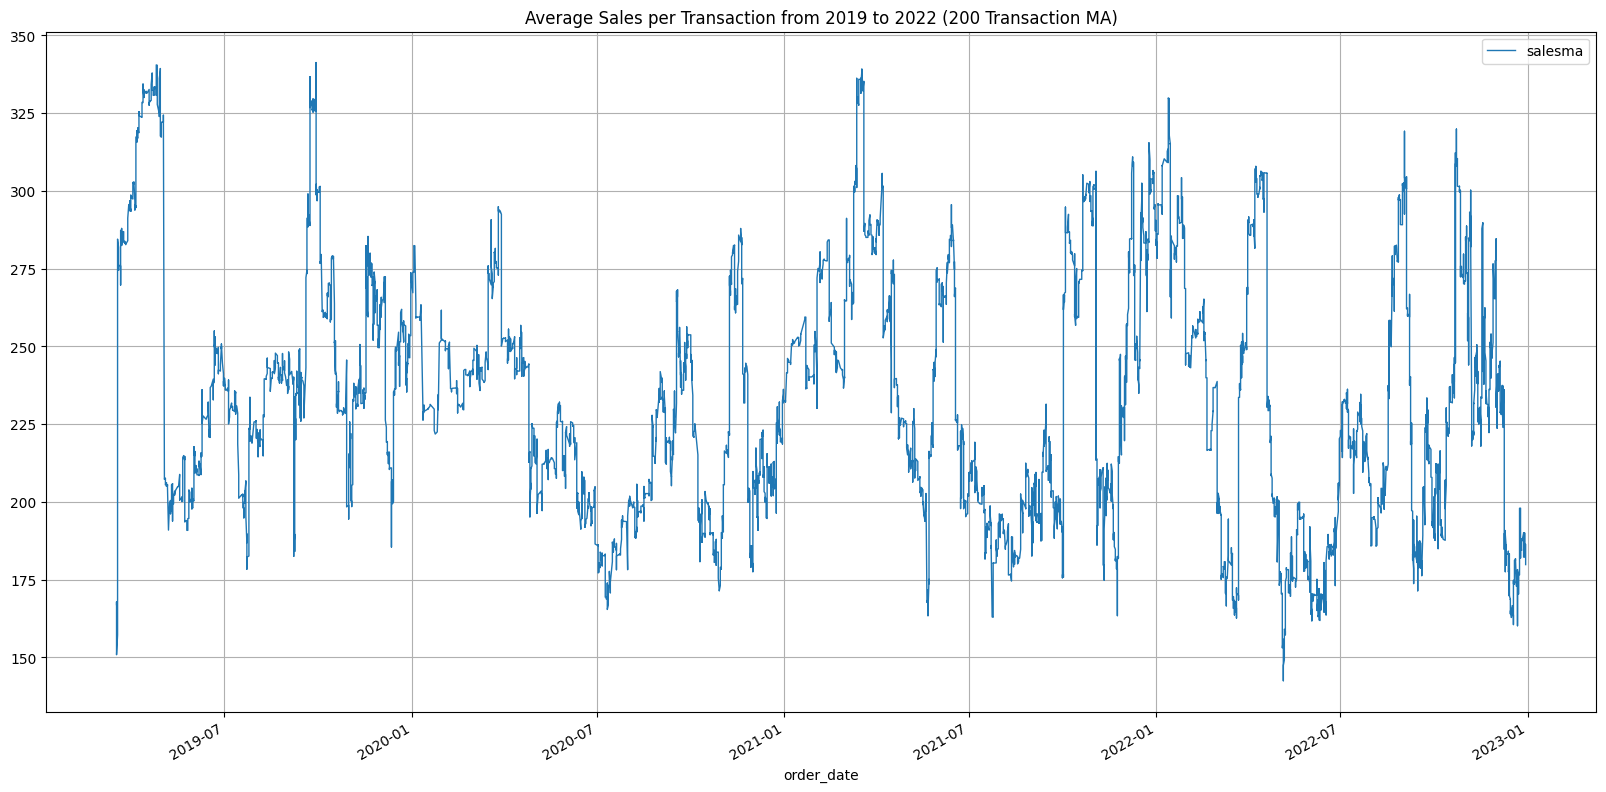

In [51]:
dfsuper.plot(x='order_date', y='salesma',figsize=(20,10), lw=1, grid=True, title='Average Sales per Transaction from 2019 to 2022 (200 Transaction MA)')

The level of sales varies quite a lot throughout the years, but we can see a higher frequency of peaks above 300 dollars in 2021 and 2022.

<Axes: title={'center': 'Average Profit per Transaction from 2019 to 2022 (200 Transaction MA)'}, xlabel='order_date'>

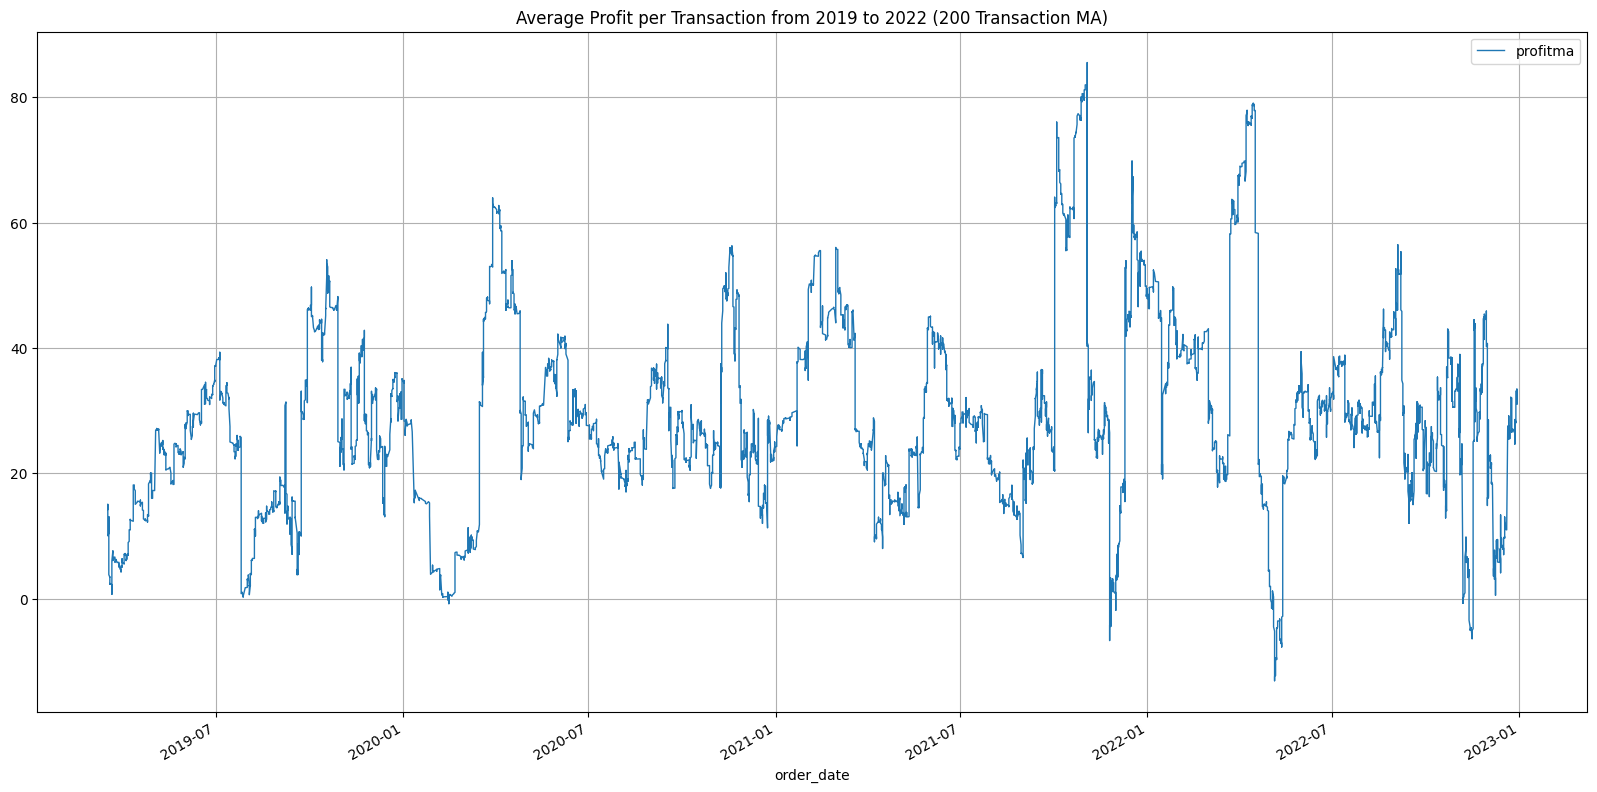

In [52]:
dfsuper.plot(x='order_date', y='profitma',figsize=(20,10), lw=1, grid=True, title='Average Profit per Transaction from 2019 to 2022 (200 Transaction MA)')

The average profits also vary a lot over the years and we cannot discern anything concrete from this graph alone.

# Part 4- Conclusion

After our data was cleaned and prepared, it was much easier to conduct analysis on. And we were able to take a look at many aspects of this Superstore dataset and gain many valuable insights.

* Central Region is not as profitable as the other regions which can be partially attributed to the large discounts it offers on its items.
* We saw the impact that various discounts have on profitability. 
* We found which items are most and least profitable. The store should keep a close eye on these items to promote the sales of the most profitable items and lessen the impact of the least profitable items.
* Sales growth and order growth have been steadily trending upwards.
* We found some seasonality in the data, indicating that Sept, Nov, and Dec are the highest selling months in the store.

I hope you enjoyed walking through this dataset as much as I enjoyed making it! Thank you for reading along.